拟合并解释线性模型

检验模型假设

模型选择

回归分析时统计学的核心，通指那些用一个或多个预测变量（也称自变量或解释变量）来预测响应变量（也称因变量、校标变量或结果变量）的方法。

分析可以用来挑选与响应变量相关的解释变量，可以描述两者的关系，也可以生成一个等式，通过解释变量来预测响应变量。

# 8.1 回归的多面性

![回归分析的各种变体.jpg](./image/回归分析的各种变体.jpg)
重点是最小二乘回归法，包括简单线性回归、多线性回归和多元线性回归。

## 8.1.1 最小二乘回归法（OLS）的适用情境

## 8.1.2 基础回顾

# 8.2 最小二乘回归法

为了能够恰当地解释OLS模型的系数，数据必须满足以下统计假设。

    正态性
    独立性
    线性
    同方差性

## 8.2.1 用lm()拟合回归模型

在R中，拟合线性模型最基本的函数就是lm()，格式为：

    myfit <- lm(formula, data)
        formula指要拟合的模型形式，
        data是一个数据框，包含了用于拟合模型的数据。

![R表达式中常用的符号.jpg](./image/R表达式中常用的符号.jpg)

![对你和线性模型非常有用的其他函数.jpg](./image/对你和线性模型非常有用的其他函数.jpg)

简单线性回归：当回归模型包含一个因变量和一个自变量时。

多项式回归：当只有一个预测变量，同时包含变量的幂（比如 ，X、X2、X3）

多元线性回归

## 8.2.2 简单线性回归

In [1]:
# 简单线性回归
fit <- lm(weight ~ height, data=women)  #数据集women提供了15个年龄在30~39岁间女性的身高和体重信息
summary(fit)  #展示拟合模型的详细结果
#得到预测等式：weight= -87.5 + 3.45*Height

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [2]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [3]:
fitted(fit)  #列出拟合模型的预测值

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [5]:
residuals(fit)  #列出拟合模型的残差值

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

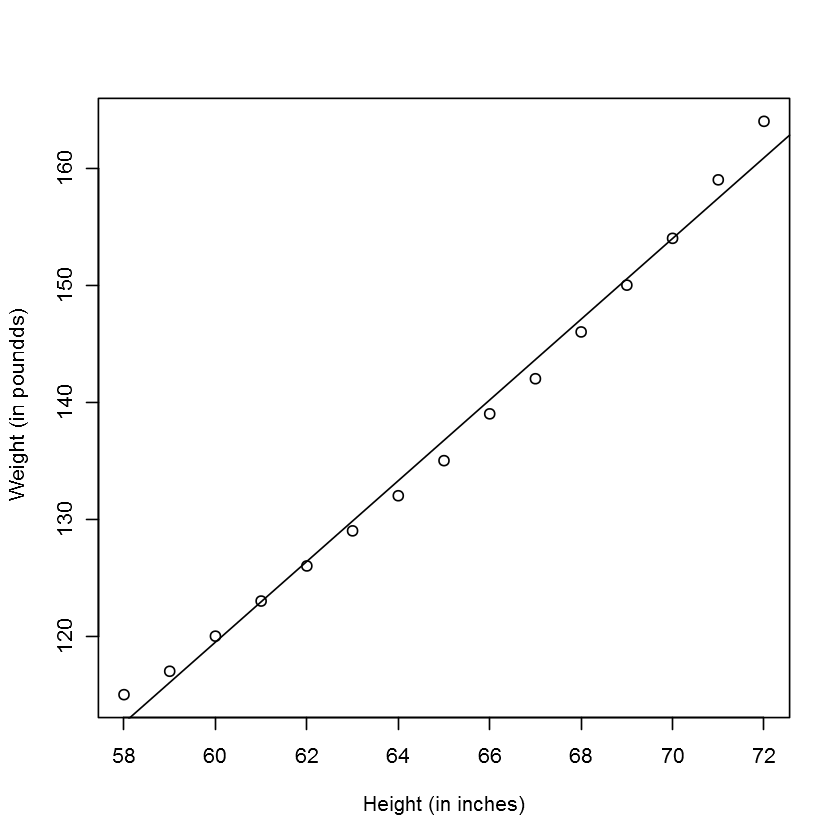

In [8]:
plot(women$height,women$weight,
    xlab="Height (in inches)",
    ylab="Weight (in poundds)")  #生成评价拟合模型的诊断图
abline(fit)  #

![线性模型与非线性模型.jpg](./image/线性模型与非线性模型.jpg)
一般来说，n次多项式生成一个n–1个弯曲的曲线。拟合三次多项式，可用：

    fit3 <- lm(weight ~ height + I(height^2) +I(height^3), data=women)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical par

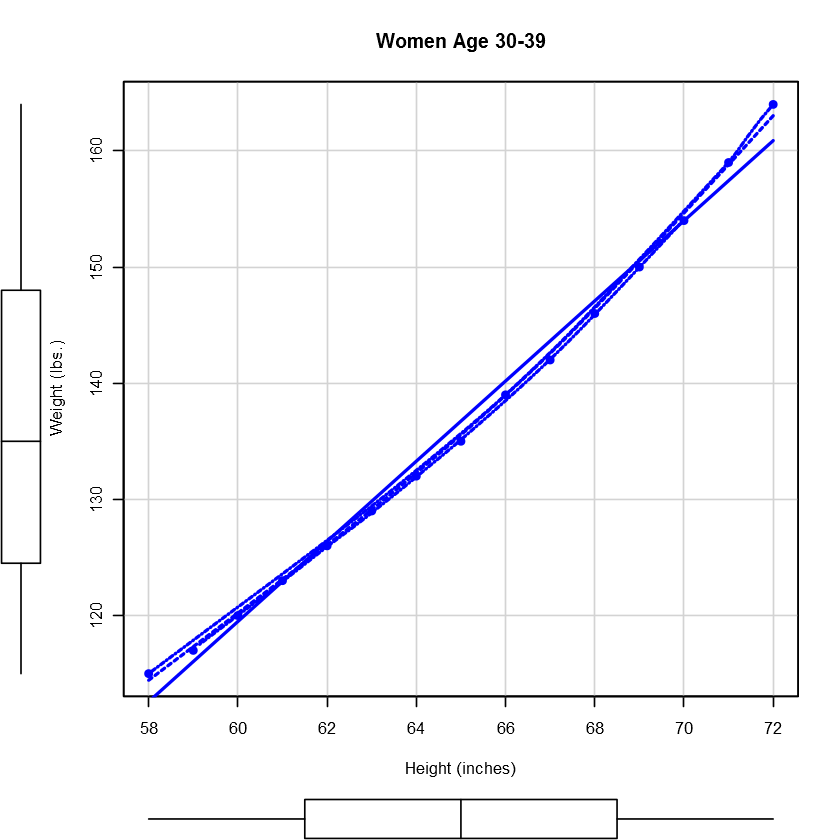

In [12]:
#car包中的scatterplot()函数可以很容易、方便地绘制二元关系图
#install.packages("car")
library(car)
scatterplot(weight ~ height, data=women,
           spread=FALSE, #删除了残差正负均方根在平滑曲线上的展开和非对称信息
           smoother.args=list(lty=2),  #设置loess拟合曲线为虚线
           pch=19, #设置点为实心圆（默认为空心圆）
           main="Women Age 30-39",
           xlab="Height (inches)",
           ylab="Weight (lbs.)")

## 8.2.4 多元线性回归

多项式回归可以算是多元线性回归的特例：二次回归有两个预测变量（X和X2），三次回归有三个预测变量（X、X2和X3）。

以基础包中的state.x77数据集为例，我们想探究一个州的犯罪率和其他因素的关系，包括人口、文盲率、平均收入和结霜天数（温度在冰点以下的平均天数）。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, 

""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning messa

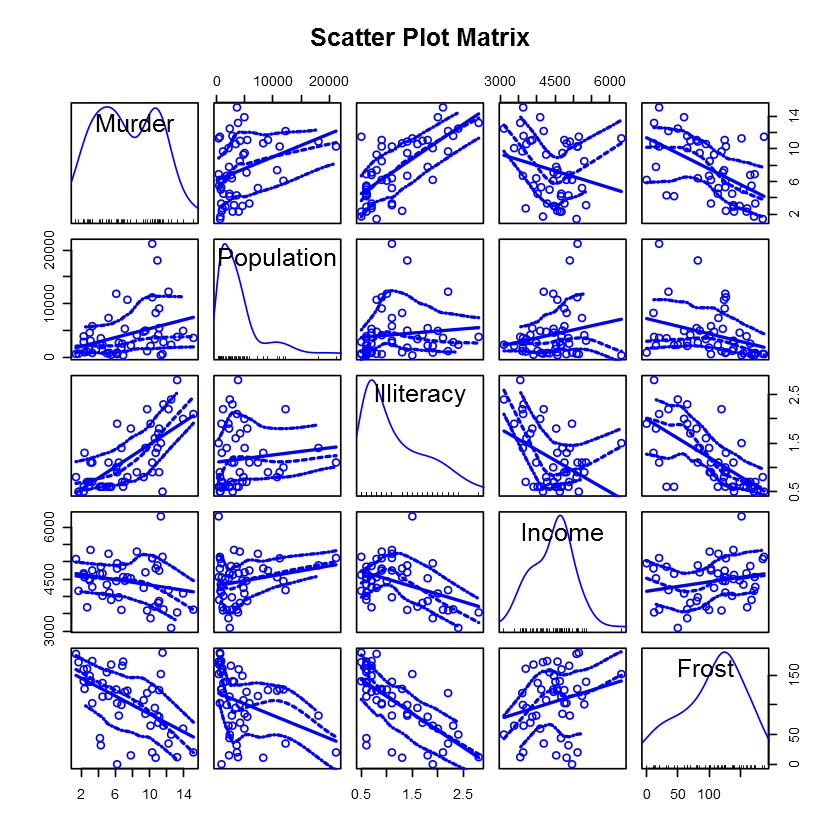

In [13]:
#多元回归分析中，第一步最好检查一下变量间的相关性。cor()函数提供了二变量之间的相关系数，car包中scatterplotMatrix()函数则会生成散点图矩阵

#检测二变量关系
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")]) #创建一个名为states的数据框
cor(states)
library(car)
scatterplotMatrix(states, spread=FALSE, smoother.args=list(lty=2),
                  main="Scatter Plot Matrix")
#scatterplotMatrix()函数默认在非对角线区域绘制变量间的散点图，并添加平滑和线性拟合曲线。对角线区域绘制每个变量的密度图和轴须图。

In [15]:
#多元线性回归
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")]) #创建一个名为states的数据框
fit <- lm(Murder ~ Population + Illiteracy +Income + Frost,
         data=states)

summary(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


## 8.2.5 有交互项的多元线性回归